### Importando bibliotecas

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
google_data = pd.read_csv('googl_daily_prices.csv')
google_data.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2025-05-21,163.690,173.140,163.5600,168.56,71569839.0
1,2025-05-20,166.430,168.500,162.9000,163.98,46607656.0
2,2025-05-19,164.510,166.640,164.2200,166.54,30426097.0
3,2025-05-16,167.725,169.350,165.6200,166.19,42846925.0
4,2025-05-15,165.840,166.205,162.3732,163.96,33146669.0


In [18]:
google_data.shape

(5223, 6)

In [19]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5223 non-null   object 
 1   1. open    5223 non-null   float64
 2   2. high    5223 non-null   float64
 3   3. low     5223 non-null   float64
 4   4. close   5223 non-null   float64
 5   5. volume  5223 non-null   float64
dtypes: float64(5), object(1)
memory usage: 245.0+ KB


In [20]:
google_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5223.000000,5223.000000,5223.000000,5223.000000,5.223000e+03
mean,765.157993,772.788930,757.138902,765.099990,9.707464e+06
std,612.991108,619.110894,606.457311,612.915417,1.200416e+07
min,85.400000,86.520000,83.340000,83.430000,4.656380e+05
25%,401.145000,405.835000,394.365000,399.705050,1.813238e+06
50%,586.000000,589.310000,579.240000,584.390000,4.563400e+06
75%,1001.455000,1008.630000,993.450000,1003.590000,1.309550e+07
max,3025.000000,3030.931500,2977.980000,2996.770000,1.277476e+08


In [21]:
missing_values = google_data.isnull().sum()
print('Valores ausentes por coluna:')
print(missing_values)

#renomeando as colunas 
google_data.columns = [col.split('. ')[-1].strip() if '. ' in col else col for col in google_data.columns ]
print('\n Colunas após serem renomeadas: ', google_data.columns.tolist())

Valores ausentes por coluna:
date         0
1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

 Colunas após serem renomeadas:  ['date', 'open', 'high', 'low', 'close', 'volume']


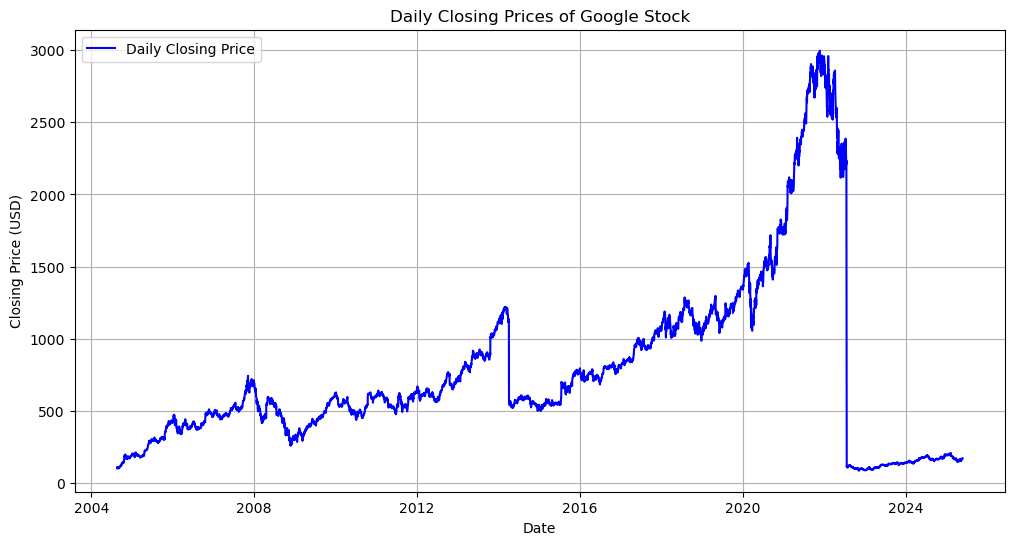

In [22]:
google_data['date'] = pd.to_datetime(google_data['date'])
plt.figure(figsize=(12, 6))
plt.plot(google_data['date'], google_data['close'], label='Daily Closing Price', color='blue')
plt.title('Daily Closing Prices of Google Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.show()

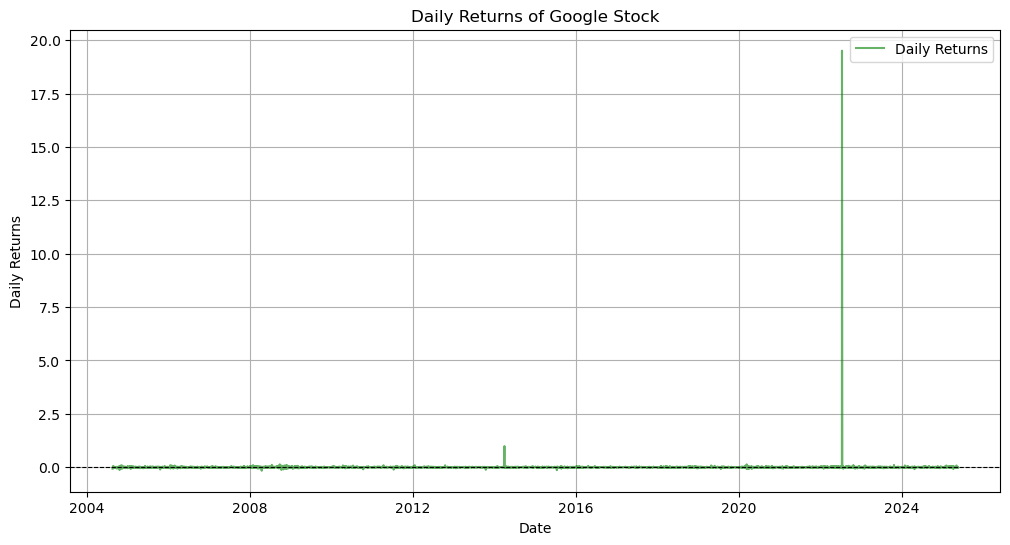

In [23]:
google_data['Daily Returns'] = google_data['close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(google_data['date'], google_data['Daily Returns'], label='Daily Returns', color='green', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Daily Returns of Google Stock')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid()
plt.show()

In [24]:
correlation_matrix = google_data[['close', 'open','Daily Returns']].corr()
correlation_matrix

,close,open,Daily Returns
close,1.000000,0.999748,0.034690
open,0.999748,1.000000,0.034729
Daily Returns,0.034690,0.034729,1.000000


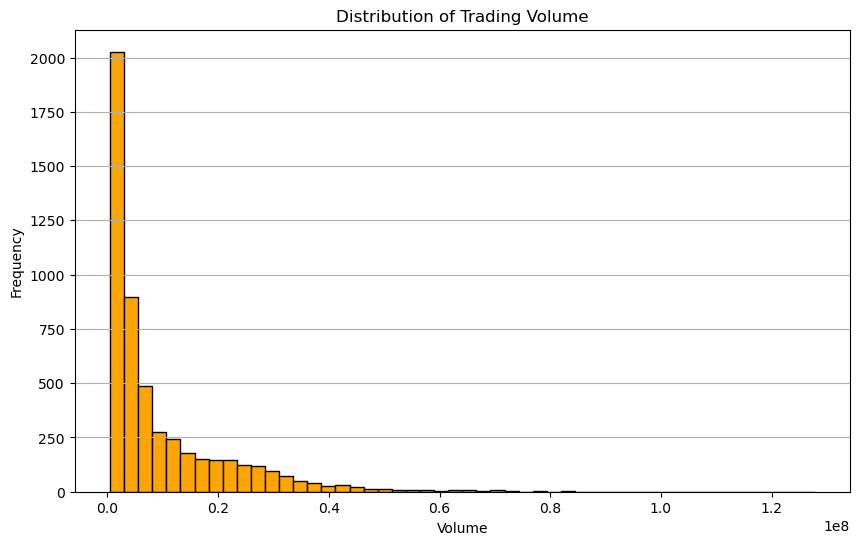

In [25]:
# Checking the distribution of the 'volume' column to understand trading activity
plt.figure(figsize=(10, 6))
plt.hist(google_data['volume'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

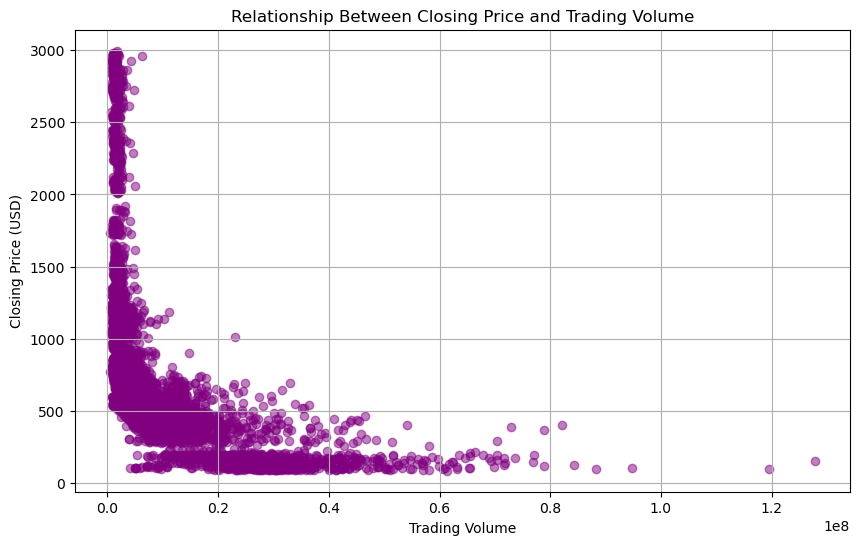

In [26]:
# Checking the relationship between '4. close' and '5. volume' using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(google_data['volume'], google_data['close'], alpha=0.5, color='purple')
plt.title('Relationship Between Closing Price and Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Closing Price (USD)')
plt.grid()
plt.show()

In [27]:
# Dropping rows with NaN values due to lag features
google_data = google_data.dropna()

# Define the features and target variable
features = ['open', 'high', 'low', 'volume', ]
target = 'close'

# Selecting features to normalize
features_to_normalize = ['open', 'high', 'low', 'close', 'volume']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

google_data[features_to_normalize] = scaler.fit_transform(google_data[features_to_normalize])

# Splitting the data into training and testing sets with a better split strategy
train_size = int(len(google_data) * 0.8)
train_data = google_data.iloc[:train_size]
test_data = google_data.iloc[train_size:]

# Splitting the data into features (X) and target (y)
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

X_train, y_train, X_test, y_test

(          open      high       low    volume
 1     0.027565  0.027843  0.027485  0.362518
 2     0.026912  0.027211  0.027941  0.235387
 3     0.028006  0.028131  0.028425  0.332972
 4     0.027364  0.027063  0.027303  0.256761
 5     0.025364  0.027333  0.026349  0.379396
 ...        ...       ...       ...       ...
 4173  0.099864  0.101711  0.096803  0.220018
 4174  0.084148  0.091692  0.078110  0.251263
 4175  0.091594  0.092541  0.088263  0.101850
 4176  0.104820  0.104598  0.094540  0.118543
 4177  0.091982  0.100336  0.090654  0.136135
 
 [4177 rows x 4 columns],
 1       0.027649
 2       0.028527
 3       0.028407
 4       0.027642
 5       0.028126
           ...   
 4173    0.099237
 4174    0.092536
 4175    0.087782
 4176    0.095862
 4177    0.102147
 Name: close, Length: 4177, dtype: float64,
           open      high       low    volume
 4178  0.077480  0.086730  0.078407  0.162700
 4179  0.088148  0.088998  0.082335  0.123098
 4180  0.083263  0.092538  0.083869  0.1

In [28]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(2.9477969592632723e-06, 0.9987714885781187)

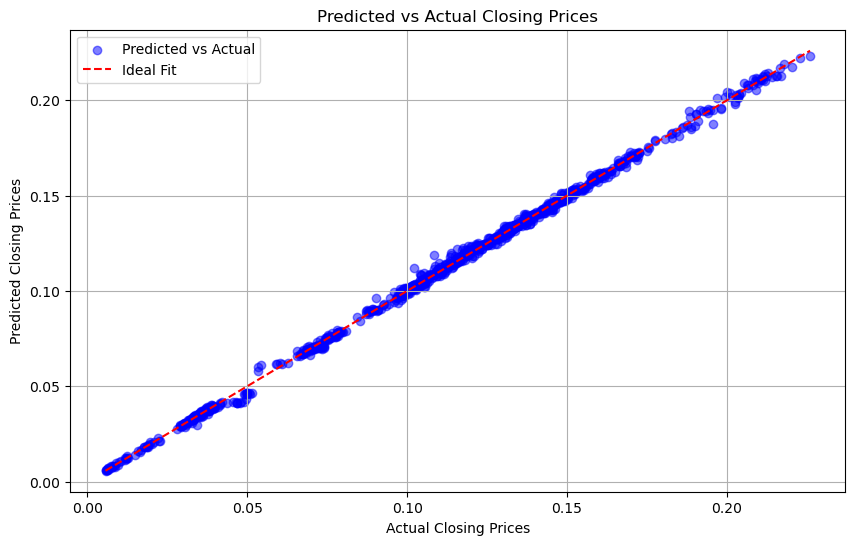

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Predicted vs Actual Closing Prices')
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.legend()
plt.grid()
plt.show()

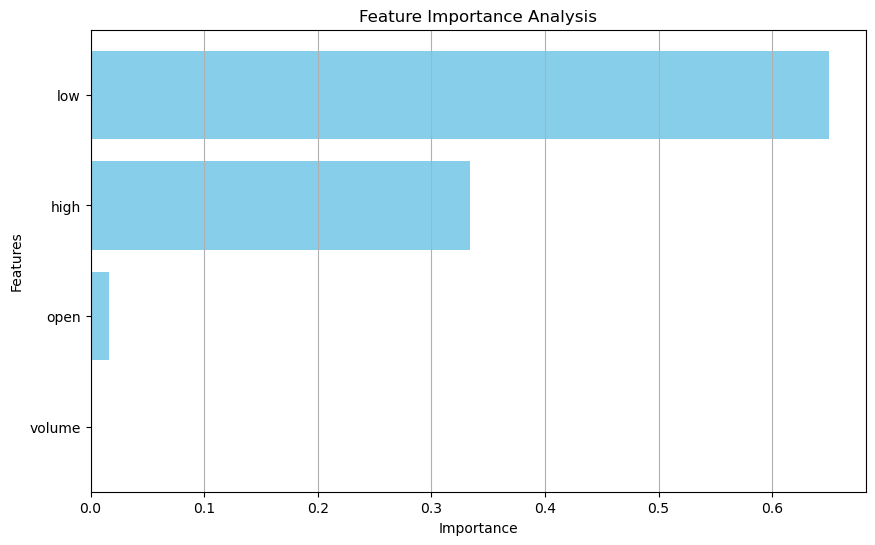

,Feature,Importance
2,low,0.649888
1,high,0.334289
0,open,0.015798
3,volume,0.000025


In [30]:
# Extracting feature importances from the Random Forest model
importances = rf_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizing feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance Analysis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

feature_importance_df